<a href="https://colab.research.google.com/github/antonvandike/Algoritmos-Geneticos/blob/main/Libro_Eyal_Wirsansky/Handson_chapter_12_1_genetic_programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Solucion del problema del control de paridad uniforme


In [ ]:
pip install deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.4 MB/s eta 0:00:00


###Configuraciones y definiciones

In [ ]:
## Paso 1: Modulos

from deap import base
from deap import creator
from deap import tools
from deap import gp

import random as rd
import numpy as np
import operator as op

import matplotlib.pyplot as plt
import seaborn as sns

import itertools
import matplotlib.pyplot as plt
import networkx as nx



In [ ]:
# Constantes del problema:

NUM_INPUTS = 3   # Numero de entradas
NUM_COMBINATIONS = 2 ** NUM_INPUTS   # Numero de combinaciones

In [ ]:
## Paso 2: Parametros del problema

# Contenido del problema

POPULATION_SIZE = 60     # Tamaño de la poblacion de individuos
P_CROSSOVER     =  0.9    # Probabilidad de cruza
P_MUTATION      =  0.5    # Probabilidad de mutación

MAX_GENERATIONS = 20    # Maximo numero de generaciones (condición de termino)

In [ ]:
HALL_OF_FAME_SIZE = 10

In [ ]:
# Constantes especificas de la progrmacion genetica:
MIN_TREE_HEIGHT = 3
MAX_TREE_HEIGHT = 5
LIMIT_TREE_HEIGHT = 17
MUT_MIN_TREE_HEIGHT = 0
MUT_MAX_TREE_HEIGHT = 2

In [ ]:
## Paso 3: Elementos aleatorios

RANDOM_SEED = 42          # Comunmente cuando se experimenta con un codigo
rd.seed(RANDOM_SEED)      # se corre el problema con los mismos parametros
                          # para repetir y compara resultados

In [ ]:
## Paso 4: Declarando el cromosoma
toolbox = base.Toolbox()

# calculate the truth table of even parity check:
parityIn = list(itertools.product([0, 1], repeat=NUM_INPUTS))
parityOut = []
for row in parityIn:
    parityOut.append(sum(row) % 2)

# create the primitive set:
primitiveSet = gp.PrimitiveSet("main", NUM_INPUTS, "in_")
primitiveSet.addPrimitive(op.and_, 2)
primitiveSet.addPrimitive(op.or_, 2)
primitiveSet.addPrimitive(op.xor, 2)
primitiveSet.addPrimitive(op.not_, 1)

# add terminal values:
primitiveSet.addTerminal(1)
primitiveSet.addTerminal(0)

toolbox.register("expr", gp.genFull, pset=primitiveSet, min_=MIN_TREE_HEIGHT, max_=MAX_TREE_HEIGHT)

In [ ]:
parityIn

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [ ]:
parityOut

[0, 1, 1, 0, 1, 0, 0, 1]

In [ ]:
## Paso 5: Crear la funcion de aptitud (FITNESS)

# Se indica maximizacion y un solo peso
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

In [ ]:
## Paso 6: Crear la funcion de  aptitud del individuo

creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin)

In [ ]:
## Paso 7: Declarar el operador para generador de individuos

toolbox.register("individualCreator", tools.initIterate, creator.Individual, toolbox.expr)

{0: Text(0.03884850720296186, 0.03158418236915494, 'and_'),
 1: Text(0.1828936558667695, -0.13385816265650713, 'and_'),
 2: Text(0.06366322573241173, -0.1670828871353711, 'xor'),
 3: Text(0.33968863623558926, -0.09398439074604795, 'or_'),
 4: Text(0.5379496908893411, -0.1120023645051513, 'or_'),
 5: Text(0.6572574348718541, -0.15552833871122412, 'in_1'),
 6: Text(0.664695982957114, -0.08533209533523232, 'in_0'),
 7: Text(0.5145981227079357, 0.032549459737978265, 'and_'),
 8: Text(0.6430004018433969, 0.07779087886589742, '0'),
 9: Text(0.6034039449672278, 0.13490171298951625, '1'),
 10: Text(-0.22308631125753525, -0.25984495177506056, 'and_'),
 11: Text(-0.43349159052710856, -0.2717304014791441, 'and_'),
 12: Text(-0.5560814233510192, -0.3271280729317692, 'in_0'),
 13: Text(-0.562564123886171, -0.26092672149476925, 'in_1'),
 14: Text(-0.38027912144795023, -0.39611317254392925, 'or_'),
 15: Text(-0.49781355418792833, -0.46246430140597855, '0'),
 16: Text(-0.448480370354163, -0.5104013244

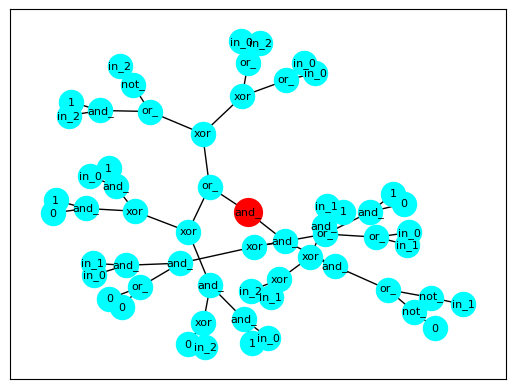

In [ ]:
  nodes, edges, labels = gp.graph(toolbox.individualCreator())
  g = nx.Graph()
  g.add_nodes_from(nodes)
  g.add_edges_from(edges)
  pos = nx.spring_layout(g)

  nx.draw_networkx_nodes(g, pos, node_color='cyan')
  nx.draw_networkx_nodes(g, pos, nodelist=[0], node_color='red', node_size=400)

  nx.draw_networkx_edges(g, pos)
  nx.draw_networkx_labels(g, pos, **{"labels": labels, "font_size": 8})

In [ ]:
## Paso 8: Declarar el operador para generar la poblacion

toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

In [ ]:
# Crear un operador para compilar el arbol primitivo en el codigo de python

toolbox.register("compile", gp.compile, pset=primitiveSet)

In [ ]:
## Paso 9: Definir función para calcular la aptitud

def parityError(individual):
    func = toolbox.compile(expr=individual)
    return sum(func(*pIn) != pOut for pIn, pOut in zip(parityIn, parityOut))

# fitness measure:
def getCost(individual):
    return parityError(individual), # return a tuple

In [ ]:
getCost(toolbox.individualCreator())

(4,)

In [ ]:
## Paso 10: Declarar el operador de evaluacion

toolbox.register("evaluate", getCost)

In [ ]:
## Paso 11: Declarar los operadores geneticos

toolbox.register("select", tools.selTournament, tournsize=2)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genGrow, min_=MUT_MIN_TREE_HEIGHT, max_=MUT_MAX_TREE_HEIGHT)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=primitiveSet)

In [ ]:
# bloat control:
toolbox.decorate("mate", gp.staticLimit(key=op.attrgetter("height"), max_value=LIMIT_TREE_HEIGHT))
toolbox.decorate("mutate", gp.staticLimit(key=op.attrgetter("height"), max_value=LIMIT_TREE_HEIGHT))

###Evolucionando la solución

In [ ]:
def parity_problem():
  # create initial population (generation 0):
  population = toolbox.populationCreator(n=POPULATION_SIZE)

  # prepare the statistics object:
  stats = tools.Statistics(lambda ind: ind.fitness.values)
  stats.register("min", np.min)
  stats.register("avg", np.mean)

  # define the hall-of-fame object:
  hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

  # perform the Genetic Algorithm flow with elitism:
  population, logbook = elitism.eaSimpleWithElitism(population,
                                                    toolbox,
                                                    cxpb=P_CROSSOVER,
                                                    mutpb=P_MUTATION,
                                                    ngen=MAX_GENERATIONS,
                                                    stats=stats,
                                                    halloffame=hof,
                                                    verbose=True)

  # print info for best solution found:
  best = hof.items[0]
  print("-- Best Individual = ", best)
  print("-- length={}, height={}".format(len(best), best.height))
  print("-- Best Fitness = ", best.fitness.values[0])


  # plot best tree:
  nodes, edges, labels = gp.graph(best)
  g = nx.Graph()
  g.add_nodes_from(nodes)
  g.add_edges_from(edges)
  pos = nx.spring_layout(g)

  nx.draw_networkx_nodes(g, pos, node_color='cyan')
  nx.draw_networkx_nodes(g, pos, nodelist=[0], node_color='red', node_size=400)

  nx.draw_networkx_edges(g, pos)
  nx.draw_networkx_labels(g, pos, **{"labels": labels, "font_size": 8})


  plt.show()

gen	nevals	min	avg    
0  	60    	2  	4.21667
1  	49    	2  	3.85   
2  	42    	2  	3.78333
3  	47    	2  	3.71667
4  	48    	1  	3.55   
5  	46    	1  	3.41667
6  	44    	1  	3.36667
7  	44    	0  	3.13333
8  	47    	0  	3.2    
9  	47    	0  	3.16667
10 	42    	0  	2.83333
11 	48    	0  	2.85   
12 	49    	0  	2.85   
13 	49    	0  	2.78333
14 	50    	0  	2.58333
15 	44    	0  	2.4    
16 	48    	0  	2.41667
17 	50    	0  	2.91667
18 	47    	0  	2.71667
19 	47    	0  	2.81667
20 	49    	0  	2.38333
-- Best Individual =  xor(or_(in_0, and_(1, in_0)), xor(in_1, in_2))
-- length=9, height=3
-- Best Fitness =  0.0


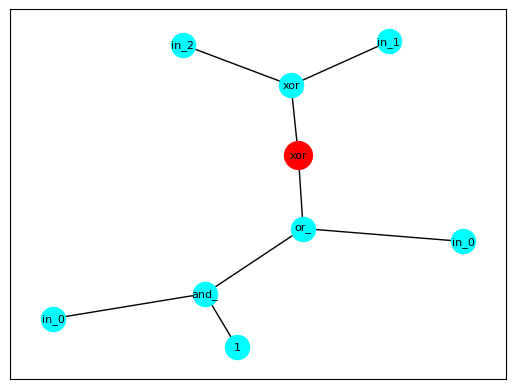

In [ ]:
parity_problem()